In [ ]:
# Margaret Johnston
# Homework 2 - due 7 February

# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [ ]:
# 1
# d/dx cos(x) -- forward difference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

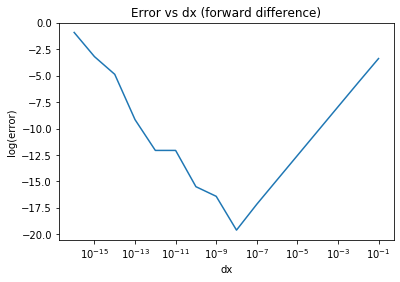

In [2]:
def dydx_fd(y,x,dx):
    dydx = (y(x+dx)-y(x))/dx
    return dydx

def test_error_fd(x,dx):
    num_fd = dydx_fd(np.cos,x,dx)
    an_fd = -np.sin(x)
    err=np.log(np.abs(num_fd-an_fd))
    #print('log(error(dx={:.2e}))={:.4f}'.format(dx,err))
    return err
    

x=np.pi/4
dx=0.1

err_array = []
dx_array = []
for iii in range(16):
    error = test_error_fd(x,dx)
    dx_array += [[dx]]
    err_array += [[error]]
    dx /= 10
    
#print(dx_array)
#print(err_array)

plt.plot(dx_array,err_array)
plt.title("Error vs dx (forward difference)")
plt.xlabel("dx")
plt.ylabel("log(error)")
plt.xscale("log")
plt.show()

Determining the exponent $n$ for $error\approx dx^{n}$ is simply determining the slope of the line on the log-log plot from the first data point to the minimum error.

$n=\frac{20-\frac{5}{2}}{8-1}=\frac{5}{2}$

We can clearly see that the minimum error occurs at $dx=10^{-8}$.


In [ ]:
# 2
# d/dx cos(x) -- central difference

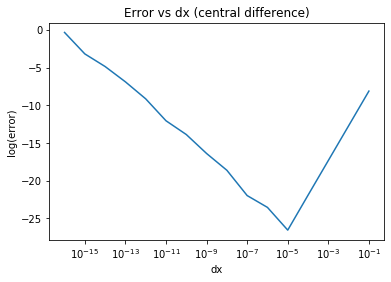

In [3]:
def dydx_cd(y,x,dx):
    dydx = (y(x+dx/2)-y(x-dx/2))/dx
    return dydx


def test_error_cd(x,dx):
    num_cd = dydx_cd(np.cos,x,dx)
    an_cd = -np.sin(x)
    err=np.log(np.abs(num_cd-an_cd))
    #print('log(error(dx={:.2e}))={:.4f}'.format(dx,err))
    return err
    

x=np.pi/4
dx=0.1

err_array = []
dx_array = []
for iii in range(16):
    error = test_error_cd(x,dx)
    dx_array += [[dx]]
    err_array += [[error]]
    dx /= 10
    
#print(dx_array)
#print(err_array)

plt.plot(dx_array,err_array)
plt.title("Error vs dx (central difference)")
plt.xlabel("dx")
plt.ylabel("log(error)")
plt.xscale("log")
plt.show()

Determining the exponent $n$ for $error\approx dx^{n}$ as before.

$n=\frac{26-8}{5-1}=\frac{9}{2}$

We can clearly see that the minimum error occurs at $dx=10^{-5}$.


In [ ]:
# 3
# d/dx cos(x)|x=0 -- central difference

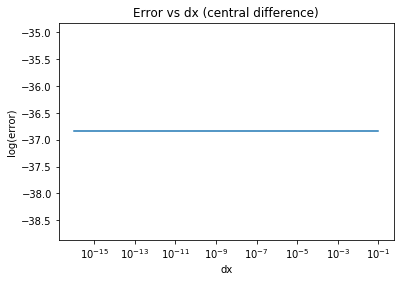

In [4]:
x=1e-16
dx=0.1

err_array = []
dx_array = []
for iii in range(16):
    error = test_error_cd(x,dx)
    dx_array += [[dx]]
    err_array += [[error]]
    dx /= 10
    
#print(dx_array)
#print(err_array)

plt.plot(dx_array,err_array)
plt.title("Error vs dx (central difference)")
plt.xlabel("dx")
plt.ylabel("log(error)")
plt.xscale("log")
plt.show()

Doing this error analysis at the point $x=0$ has problems two main problems.

First, that $log_{10}(0)=-\infty$. The analytic solution to the derivative ($-sin(x)$) is zero at $x=0$, so as soon as we get down to machine precision on the numerical derivative, we can no longer calculate the error. $log_{10}(numerical-analytic)=log_{10}(0)=-\infty$

Second is that, even if we are at some point close to zero, our analysis is entirely based on the difference of two increasingly similar numbers, which we already know is frought with round-off error. This leads to the unfortunate fact that we can no longer use $dx$ to increase the precision of our numerical calculation.